In [48]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. Data

We have data on popular greek mythological figures in tabular form, with each row containing the following information:

- NAME: The name of the person
- FATHER: The name of the person's father
- MOTHER: The name of the person's mother
- SEX: The sex of the person
- POPULARITY: the number of Google results for the person's name

Reading in the dataset and taking a initial look:

In [55]:
# reading in the data
df = pd.read_csv("greek-gods.csv", sep=";")
df.columns = map(str.capitalize, df.columns)

# taking a look at it
print(f"we have {len(df)} records with {df.Name.nunique()} names.\n")
df.head()

we have 117 records with 117 names.



,Name,Father,Mother,Sex,Popularity
0,Acis,Pan,Symaethis,M,1520000
1,Acrisius,NaN,NaN,M,28400
2,Aether,Erebus,Nyx,U,1850000
3,Aethra,NaN,NaN,F,108000
4,Agave,Nereus,Doris,F,4460000


I want to see how many nulls we have per column:

In [56]:
print("Col         : Nulls")
for col in df.columns:
    print(f"{col:12}: {sum(df[col].isna()):3}")

Col         : Nulls
Name        :   0
Father      :  22
Mother      :  19
Sex         :   0
Popularity  :   0


So some of the ppl are missing parents, and since they are mythological figures that makes sense.

# 2. Building a graph

I'm putting all the gods, mothers and fathers into one set:

In [134]:
nodes = set()
edges = []
mothers = set()
fathers = set()


for god in df.itertuples():
    nodes.add(god.Name)
    
    if type(god.Mother) is not float:
        nodes.add(god.Mother)
        edges.append((god.Mother, god.Name))
        mothers.add(god.Mother)
        
    if type(god.Father) is not float:
        nodes.add(god.Father)
        edges.append((god.Father, god.Name))
        fathers.add(god.Father)

mother_father = mothers & fathers
        
f"There are a total of {len(nodes)} gods"
len(fathers), len(mothers), len(mother_father)

(28, 39, 0)

So there are no parents who are both mother and father.

In [158]:
G = nx.DiGraph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

colors = []
labels = dict()

for n in G.nodes:
    labels[n] = n
    if n in mothers:
        colors.append("red")
    elif n in fathers:
        colors.append("blue")
    else:
        colors.append("purple")
        
len(colors)

117

In [201]:
degrees = dict(G.degree)
node_sizes = [v * 600 for k, v in degrees.items()]

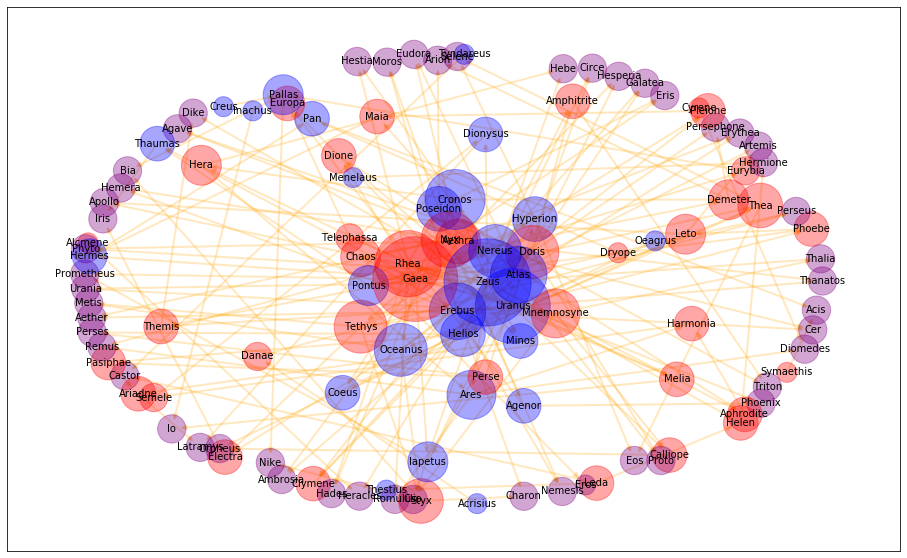

In [179]:
fig, ax = plt.subplots(figsize=(16,10))
#ax.set_title("Initial graph")

pos = nx.layout.spring_layout(G, k=3, iterations=200, seed=1)

nx.draw_networkx_nodes(G, pos, ax=ax,
                       nodelist=list(G.nodes), labels=labels,
                       node_color=colors,
                       node_size=node_sizes,
                       alpha=0.35)

nx.draw_networkx_labels(G, pos, alpha=1, font_size=10)

nx.draw_networkx_edges(G, pos, edgelist=list(G.edges), ax=ax, 
                       alpha=0.25, edge_color='orange', width=2);

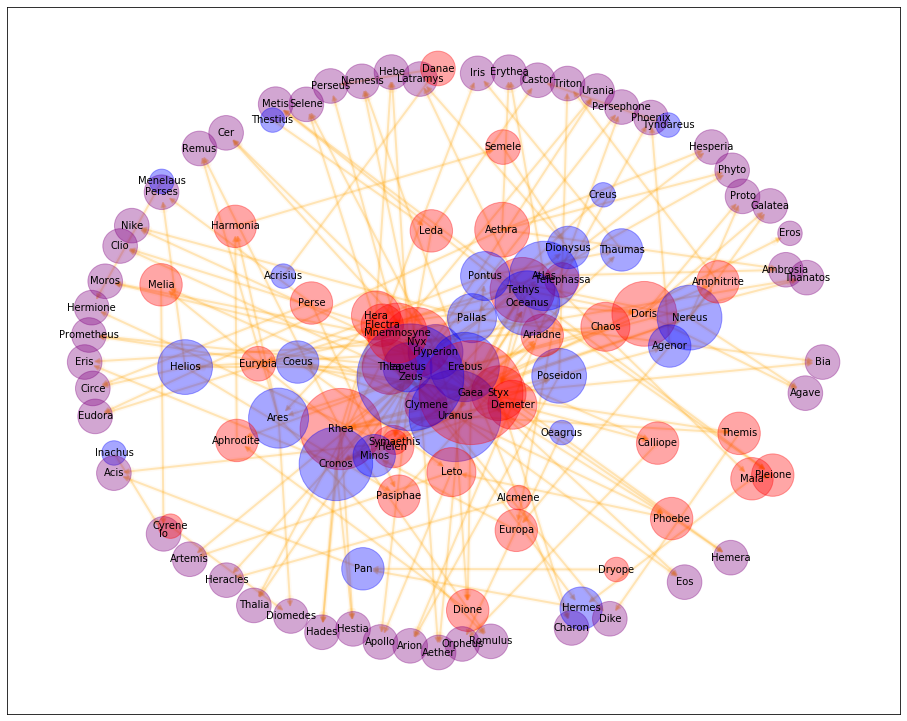

In [206]:
fig, ax = plt.subplots(figsize=(16,13))
#ax.set_title("Initial graph")

pos = nx.layout.fruchterman_reingold_layout(G, k=2.1, iterations=242, scale=1.19)

nx.draw_networkx_nodes(G, pos, ax=ax,
                       nodelist=list(G.nodes), labels=labels,
                       node_color=colors,
                       node_size=node_sizes,
                       alpha=0.35)

nx.draw_networkx_labels(G, pos, alpha=1, font_size=10)

nx.draw_networkx_edges(G, pos, edgelist=list(G.edges), ax=ax, 
                       alpha=0.05, edge_color='orange', width=5)

nx.draw_networkx_edges(G, pos, edgelist=list(G.edges), ax=ax, 
                       alpha=0.25, edge_color='orange', width=2);